## Exploratory Data Analysis

#### Import package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import seaborn as sns

%matplotlib inline

#### Read dataset

In [3]:
dataset_folder = os.getcwd() + '/../dataset'

train = pd.read_csv(dataset_folder + '/train.csv')
# processed_train = pd.read_csv('../dataset/2019-02-27_19-31_processed_train.csv', index_col=0)

#### Basic information about training data

In [3]:
nrow, ncol = train.shape
nrow, ncol

(3000, 23)

In [4]:
columns = train.columns.values
columns

array(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue'], dtype=object)

The feature 'belongs_to_collection' and 'homepage' should be drop since there are too many missing values

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [6]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

#### Distribution for revenue

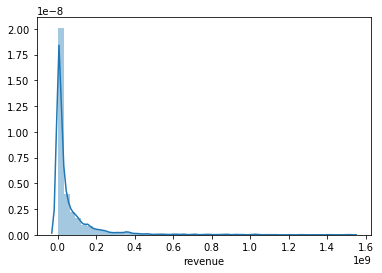

In [7]:
sns.distplot(train.revenue)

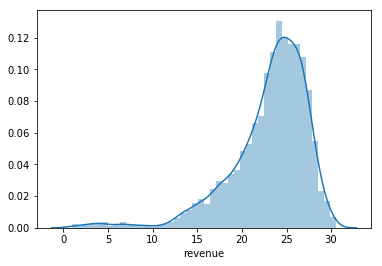

In [8]:
sns.distplot(np.log2(train.revenue + 1))

#### Scatterplot and distribution for numeric features

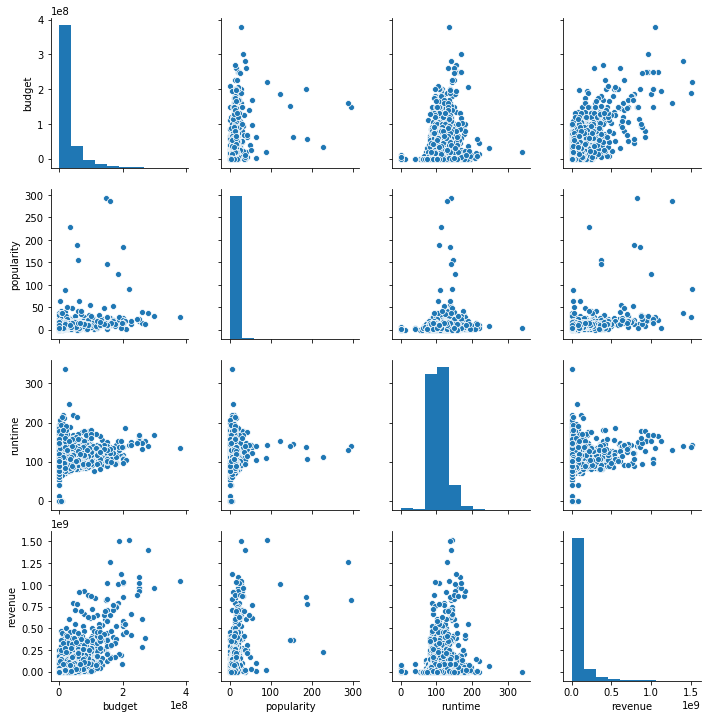

In [9]:
train_numeric = train.select_dtypes(['number']).drop(['id'], axis=1).fillna(0)
sns.pairplot(train_numeric)

There are a lot of zeros in the feature 'budget', they are probably represented as missing values.

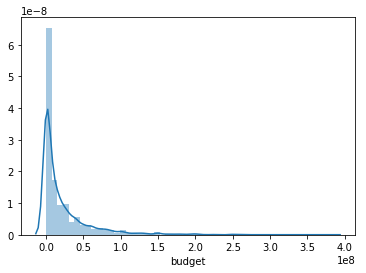

In [10]:
sns.distplot(train_numeric.budget)

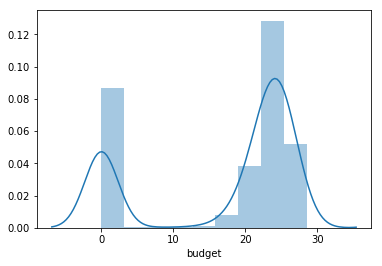

In [11]:
sns.distplot(np.log2(train_numeric.budget + 1))

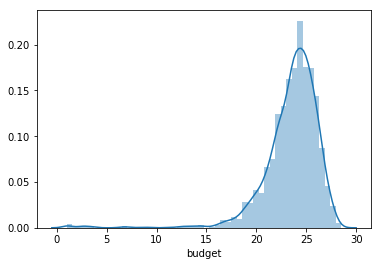

In [12]:
sns.distplot(np.log2(train_numeric.budget[train_numeric.budget != 0] + 1))

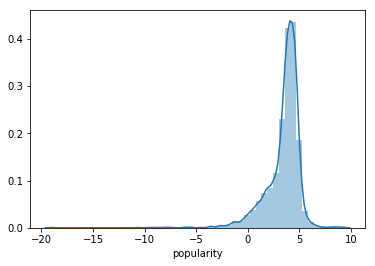

In [13]:
sns.distplot(np.log2(train_numeric.popularity) + 1)

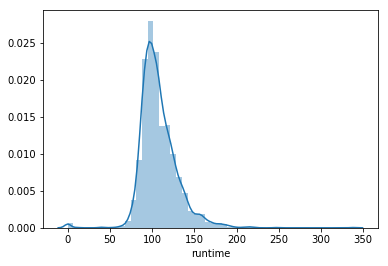

In [14]:
sns.distplot(train_numeric.runtime)

#### Scatterplot and distribution for processed numeric features

In [15]:
processed_train_numeric = processed_train.loc[:,['vote_average', 'vote_count', 'num_of_production_companies',
                                                 'num_of_production_countries', 'num_of_spoken_languages',
                                                 'num_of_Keywords', 'num_of_cast', 'num_of_crew', 'revenue']]

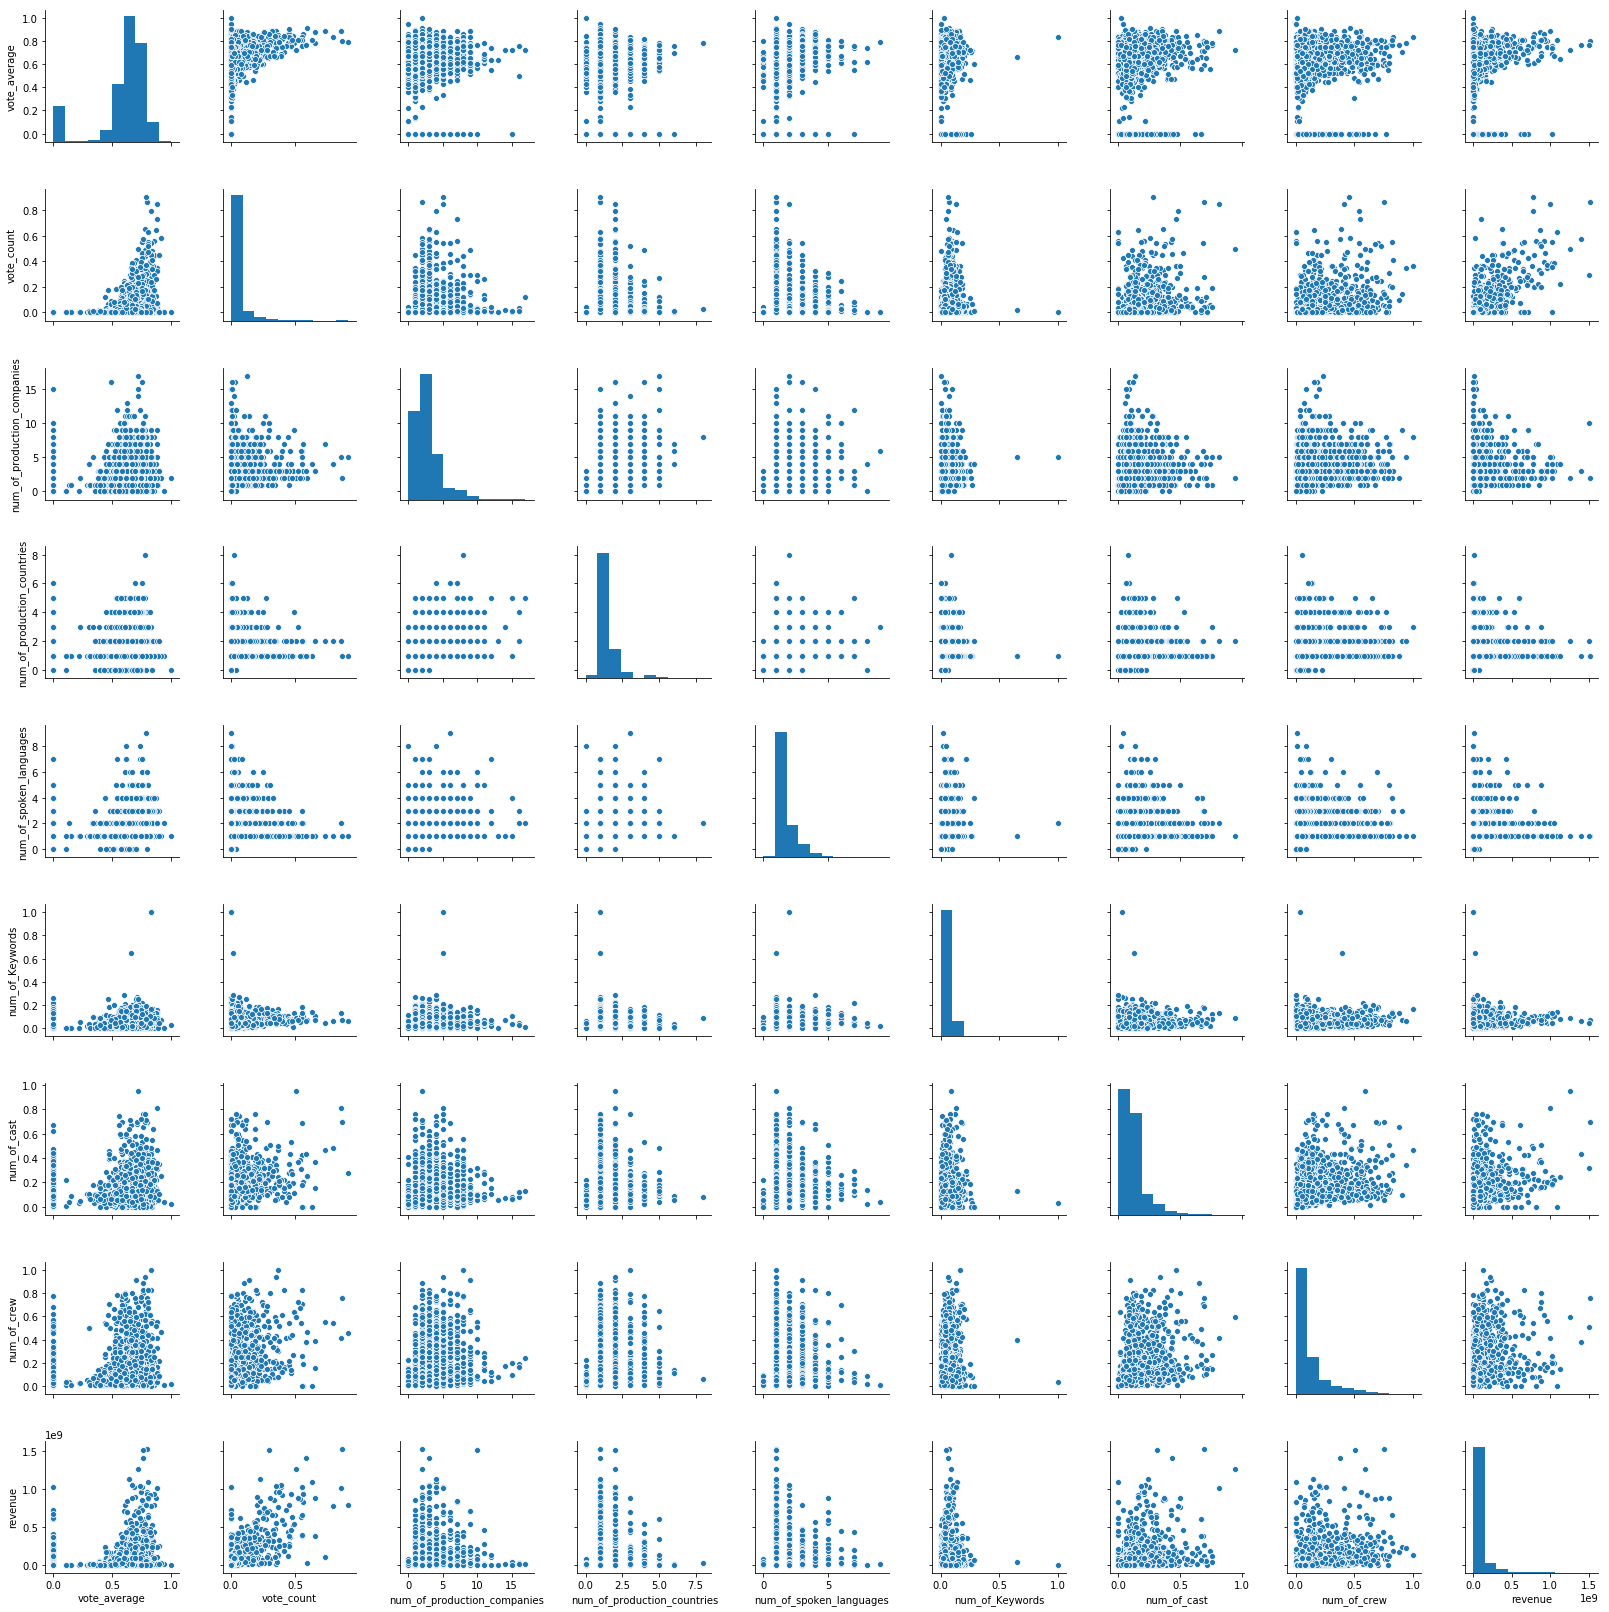

In [16]:
sns.pairplot(processed_train_numeric)

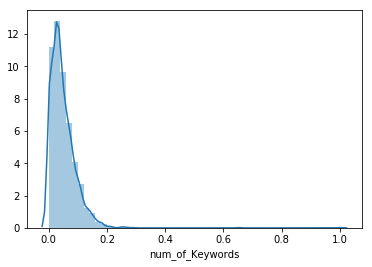

In [17]:
sns.distplot(processed_train.num_of_Keywords)

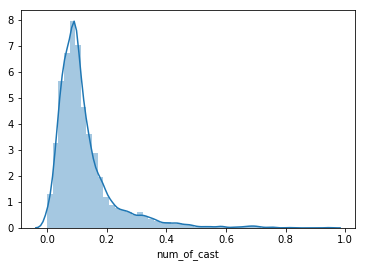

In [18]:
sns.distplot(processed_train.num_of_cast)

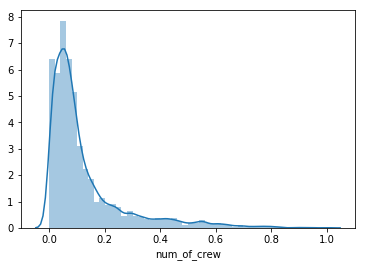

In [19]:
sns.distplot(processed_train.num_of_crew)

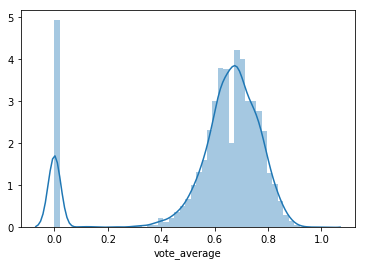

In [20]:
sns.distplot(processed_train.vote_average)

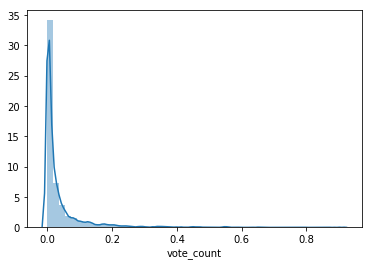

In [21]:
sns.distplot(processed_train.vote_count)

#### Correlation matrix for numeric features

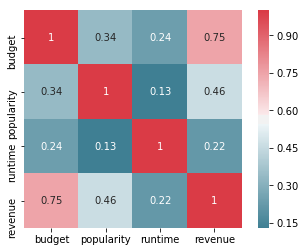

In [22]:
corr = train_numeric.corr().round(2)
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

#### Correlation matrix for processed numeric features

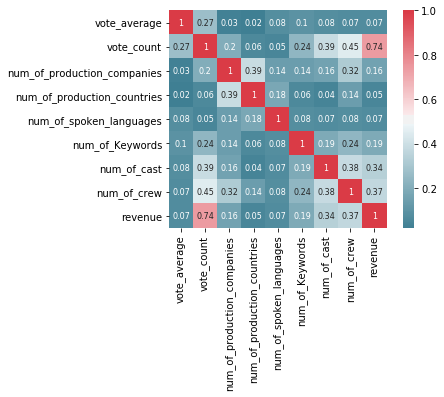

In [23]:
corr = processed_train_numeric.corr().round(2)
sns.heatmap(corr, annot=True, annot_kws={"size": 8}, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

#### Time series data analysis
The year of the release date is probably from 1921 to 2017

In [24]:
train.release_date.str.extract('\S+/\S+/(\S+)', expand=False).value_counts().sort_index().head(25)

00     65
01     77
02     84
03     74
04     83
05     99
06    114
07    105
08    101
09    106
10    126
11    124
12    125
13    141
14    123
15    128
16    125
17     40
21      1
24      1
25      2
26      1
27      2
28      3
30      1
Name: release_date, dtype: int64

In [25]:
train['release_month'] = train.release_date.str.extract('(\S+)/\S+/\S+', expand=False).astype(np.int16)
train['release_year'] = train.release_date.str.extract('\S+/\S+/(\S+)', expand=False).astype(np.int16)
train['release_day'] = train.release_date.str.extract('\S+/(\S+)/\S+', expand=False).astype(np.int16)
train.loc[(21 <= train.release_year) & (train.release_year <= 99), 'release_year'] += 1900
train.loc[train.release_year < 21, 'release_year'] += 2000

train['release_date'] = pd.to_datetime(train.release_day.astype(str) + '-' + 
                                       train.release_month.astype(str) + '-' + 
                                       train.release_year.astype(str))

train['release_weekday'] = train.release_date.dt.weekday_name.str.slice(0, 3)

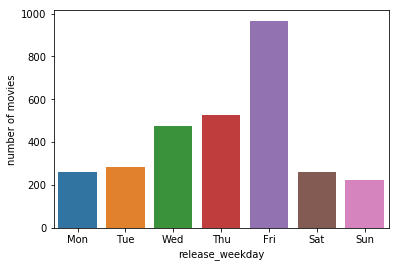

In [26]:
fig = sns.countplot(train.release_weekday, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
fig.set(ylabel='number of movies')

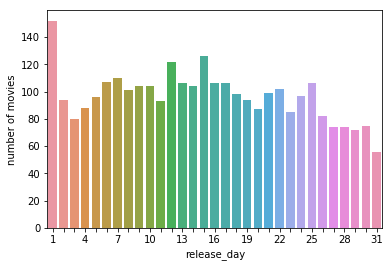

In [27]:
fig = sns.countplot(train.release_day)
fig.set(ylabel='number of movies')
for index, label in enumerate(fig.xaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)

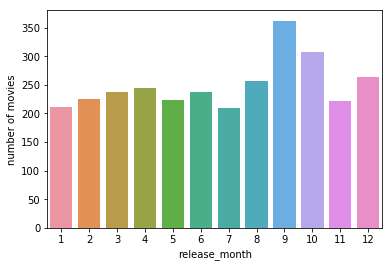

In [28]:
fig = sns.countplot(train.release_month)
fig.set(ylabel='number of movies')

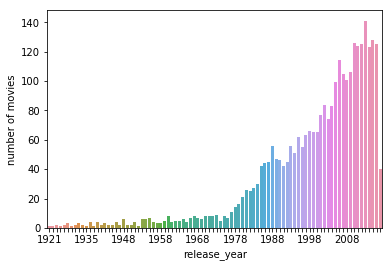

In [29]:
fig = sns.countplot(train.release_year)
fig.set(ylabel='number of movies')
for index, label in enumerate(fig.xaxis.get_ticklabels()):
    if index % 10 != 0:
        label.set_visible(False)

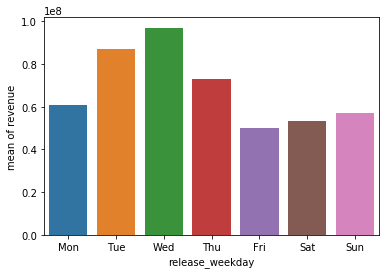

In [30]:
revenue_by_weekday = train.groupby('release_weekday')['revenue'].aggregate([np.mean])
revenue_by_weekday.reset_index(inplace=True)
fig =sns.barplot(x='release_weekday', y='mean', data=revenue_by_weekday, 
                 order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
fig.set(ylabel='mean of revenue')

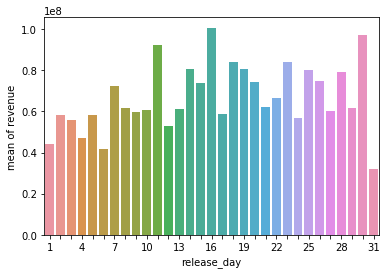

In [31]:
revenue_by_day = train.groupby('release_day')['revenue'].aggregate([np.mean])
revenue_by_day.reset_index(inplace=True)
fig =sns.barplot(x='release_day', y='mean', data=revenue_by_day)
fig.set(ylabel='mean of revenue')
for index, label in enumerate(fig.xaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)

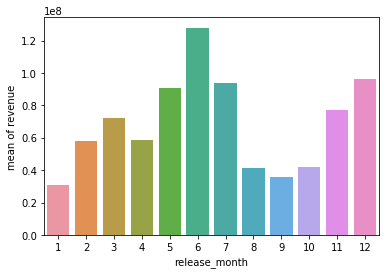

In [32]:
revenue_by_month = train.groupby('release_month')['revenue'].aggregate([np.mean])
revenue_by_month.reset_index(inplace=True)
fig =sns.barplot(x='release_month', y='mean', data=revenue_by_month)
fig.set(ylabel='mean of revenue')

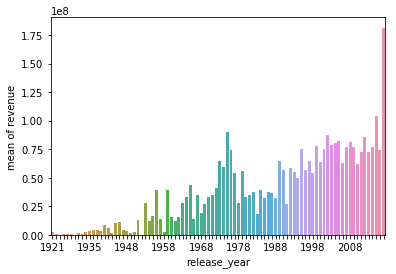

In [33]:
revenue_by_year = train.groupby('release_year')['revenue'].aggregate([np.mean])
revenue_by_year.reset_index(inplace=True)
fig = sns.barplot(x='release_year', y='mean', data=revenue_by_year)
fig.set(ylabel='mean of revenue')
for index, label in enumerate(fig.xaxis.get_ticklabels()):
    if index % 10 != 0:
        label.set_visible(False)

#### Revenue for original language

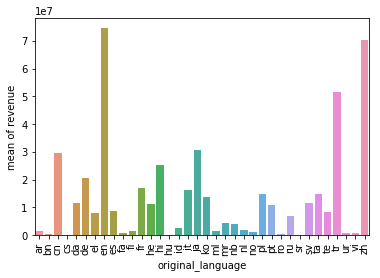

In [34]:
revenue_by_lang = train.groupby('original_language')['revenue'].aggregate([np.mean])
revenue_by_lang.reset_index(inplace=True)
fig = sns.barplot(x='original_language', y='mean', data=revenue_by_lang)
fig.set(ylabel='mean of revenue')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

#### Revenue for status

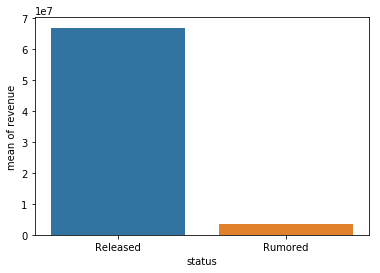

In [35]:
revenue_by_status = train.groupby('status')['revenue'].aggregate([np.mean])
revenue_by_status.reset_index(inplace=True)
fig = sns.barplot(x='status', y='mean', data=revenue_by_status)
fig.set(ylabel='mean of revenue')

#### Number of movies and median revenue for each genre

In [36]:
train.loc[train.genres.isnull(), 'genres'] = "{}"
train['genres'] = train.genres.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
genres = train.genres.str.get_dummies(sep=',')

Number of movies for each genre:

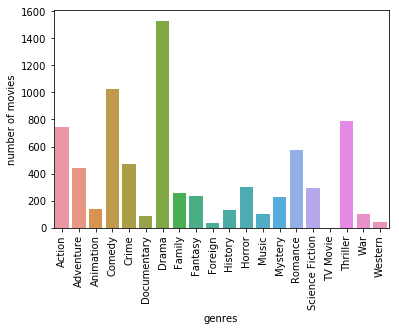

In [37]:
movies_by_genre = pd.DataFrame(genres.sum(axis=0)).reset_index()
movies_by_genre.columns = ['genres', 'movies']
fig = sns.barplot(x='genres', y='movies', data=movies_by_genre)
fig.set(ylabel='number of movies')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

Median of revenue for each genre:

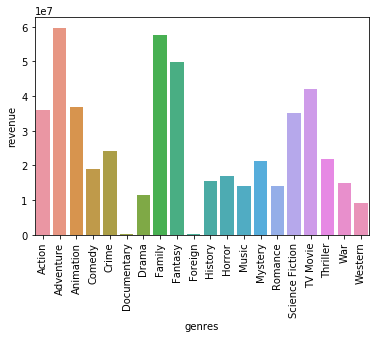

In [38]:
revenue_by_genre = list()
for col in genres.columns:
    revenue_by_genre.append([col, train.loc[genres[col]==1, 'revenue'].median()])
revenue_by_genre = pd.DataFrame(revenue_by_genre, columns=['genres', 'revenue'])
fig = sns.barplot(x='genres', y='revenue', data=revenue_by_genre)
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

#### Number of movies and median revenue for production company

In [39]:
train.loc[train.production_companies.isnull(), 'production_companies'] = "{}"
train['production_companies'] = train.production_companies.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
companies = train.production_companies.str.get_dummies(sep=',')

Number of movies for each production company:

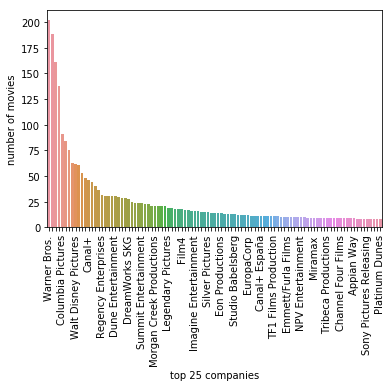

In [40]:
movies_by_companies = pd.DataFrame(companies.sum(axis=0)).reset_index()
movies_by_companies.columns = ['company', 'movies']
top_100_companies = movies_by_companies.sort_values(by='movies', ascending=False).reset_index().loc[0:100]
fig = sns.barplot(x='company', y='movies', data=top_100_companies)
fig.set(ylabel='number of movies', xlabel='top 25 companies')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for index, label in enumerate(fig.xaxis.get_ticklabels()):
    if index % 4 != 0:
        label.set_visible(False)

Median of revenue for each production company:

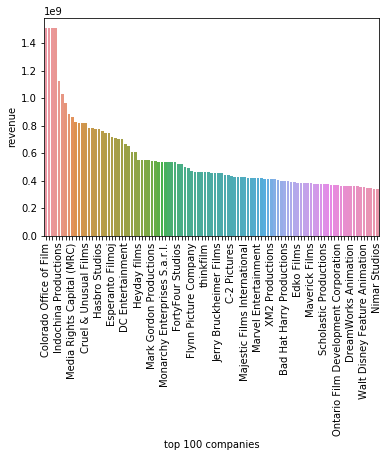

In [41]:
revenue_by_companies = list()
for col in companies.columns:
    revenue_by_companies.append([col, train.loc[companies[col]==1, 'revenue'].median()])
revenue_by_companies = pd.DataFrame(revenue_by_companies, columns=['company', 'revenue'])
top_100_companies = revenue_by_companies.sort_values(by='revenue', ascending=False).reset_index().loc[0:100]
fig = sns.barplot(x='company', y='revenue', data=top_100_companies)
fig.set(xlabel='top 100 companies')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for index, label in enumerate(fig.xaxis.get_ticklabels()):
    if index % 4 != 0:
        label.set_visible(False)

#### Number of movies and median revenue for production country

In [42]:
train.loc[train.production_countries.isnull(), 'production_countries'] = "{}"
train['production_countries'] = train.production_countries.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
countries = train.production_countries.str.get_dummies(sep=',')

Number of movies for each production country:

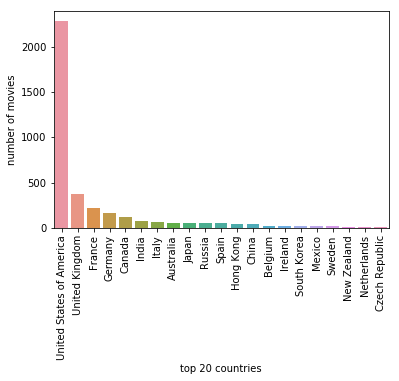

In [43]:
movies_by_countries = pd.DataFrame(countries.sum(axis=0)).reset_index()
movies_by_countries.columns = ['countries', 'movies']
top_20_countries = movies_by_countries.sort_values(by='movies', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='countries', y='movies', data=top_20_countries)
fig.set(ylabel='number of movies', xlabel='top 20 countries')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

Median of revenue for each production country:

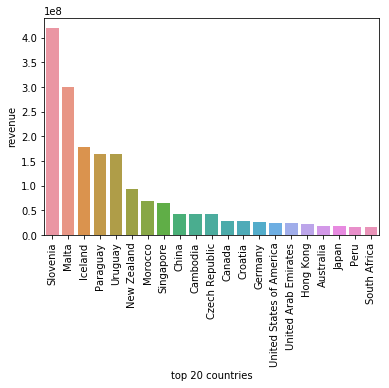

In [44]:
revenue_by_countries = list()
for col in countries.columns:
    revenue_by_countries.append([col, train.loc[countries[col]==1, 'revenue'].median()])
revenue_by_countries = pd.DataFrame(revenue_by_countries, columns=['country', 'revenue'])
top_20_countries = revenue_by_countries.sort_values(by='revenue', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='country', y='revenue', data=top_20_countries)
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set(xlabel='top 20 countries')

#### Number of movies and median revenue for spoken language

In [45]:
train.loc[train.spoken_languages.isnull(), 'spoken_languages'] = "{}"
train['spoken_languages'] = train.spoken_languages.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
languages = train.spoken_languages.str.get_dummies(sep=',')

Number of movies for each spoken language:

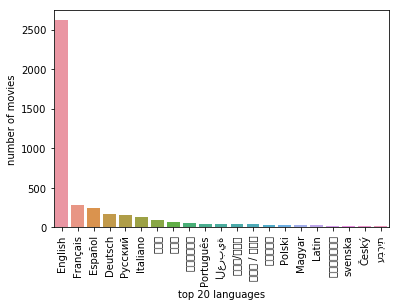

In [46]:
movies_by_languages = pd.DataFrame(languages.sum(axis=0)).reset_index()
movies_by_languages.columns = ['language', 'movies']
top_20_languages = movies_by_languages.sort_values(by='movies', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='language', y='movies', data=top_20_languages)
fig.set(ylabel='number of movies', xlabel='top 20 languages')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

Median of revenue for each production country:

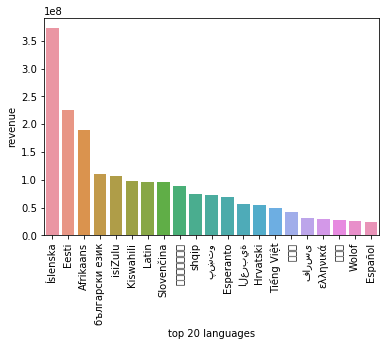

In [47]:
revenue_by_languages = list()
for col in languages.columns:
    revenue_by_languages.append([col, train.loc[languages[col]==1, 'revenue'].median()])
revenue_by_languages = pd.DataFrame(revenue_by_languages, columns=['language', 'revenue'])
top_20_languages = revenue_by_languages.sort_values(by='revenue', ascending=False).reset_index().loc[0:20]
fig = sns.barplot(x='language', y='revenue', data=top_20_languages)
fig.set(xlabel='top 20 languages')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

#### Feature importance

In [48]:
with open('../dataset/2019-02-27_21-33_model.pickle', 'rb') as f:
    model = pickle.load(f)

In [49]:
feature_importance = pd.DataFrame({'feature': processed_train.columns.drop(['revenue']),
                                   'importance': model.feature_importances_})

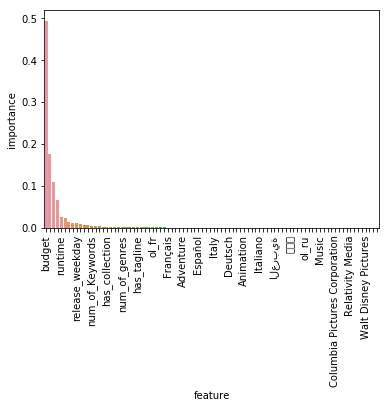

In [50]:
fig = sns.barplot(x='feature', y='importance', data=feature_importance.sort_values(by='importance', ascending=False))
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for index, label in enumerate(fig.xaxis.get_ticklabels()):
    if index % 4 != 0:
        label.set_visible(False)